# PROBABILITA' DI SOPRAVVIVENZA AL TITANIC
Le analisi sono state svolte sui dati dei passeggeri del Titanic (training set Titanic).


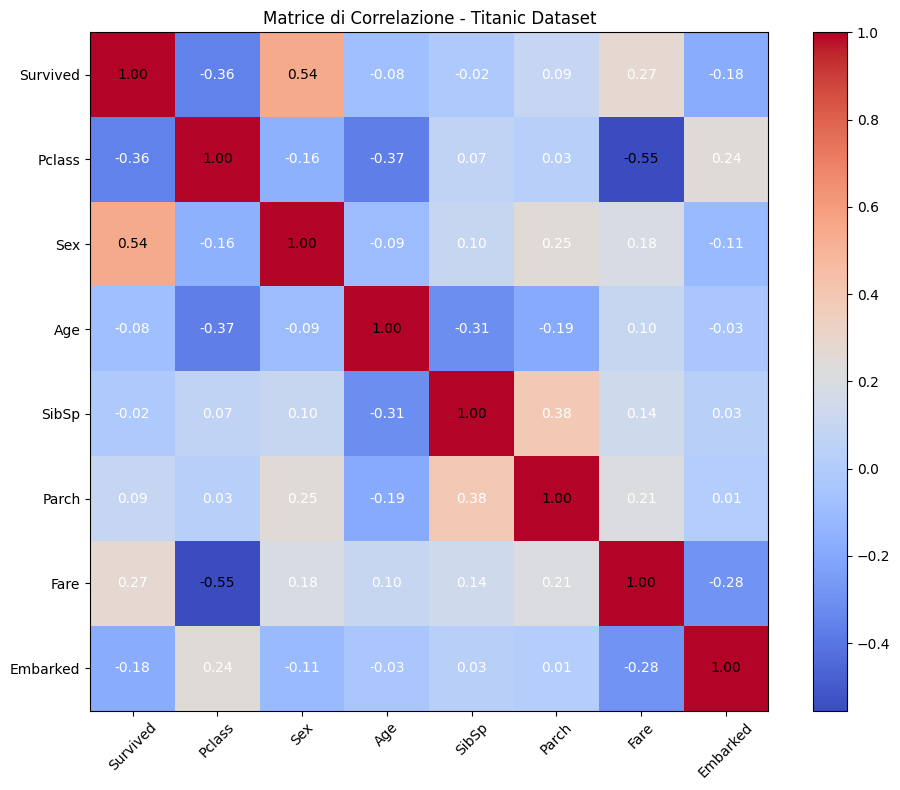

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carica il dataset
titanic_data = pd.read_csv('titanic.csv')

# Prepara i dati
# Converti le variabili categoriche in numeriche
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Converti 'Embarked' in numerico

# Rimuovi le righe con valori NaN in 'Age'
titanic_data = titanic_data.dropna(subset=['Age'])

# Seleziona le colonne di interesse
correlation_data = titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Calcola la matrice di correlazione
correlation_matrix = correlation_data.corr()

# Crea un heatmap (callerogramma) usando solo matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Aggiungi le etichette
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)

# Aggiungi i valori della matrice
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='white' if abs(val) < 0.5 else 'black')

plt.title('Matrice di Correlazione - Titanic Dataset')
plt.tight_layout()
plt.show()

## MATRICE DI CORRELAZIONE TRA I DATI SCELTI

Attraverso il precedente correlogramma abbiamo trovato che i dati che incidono di più sulla sopravvivenza sono il sesso, l'età e la classe.

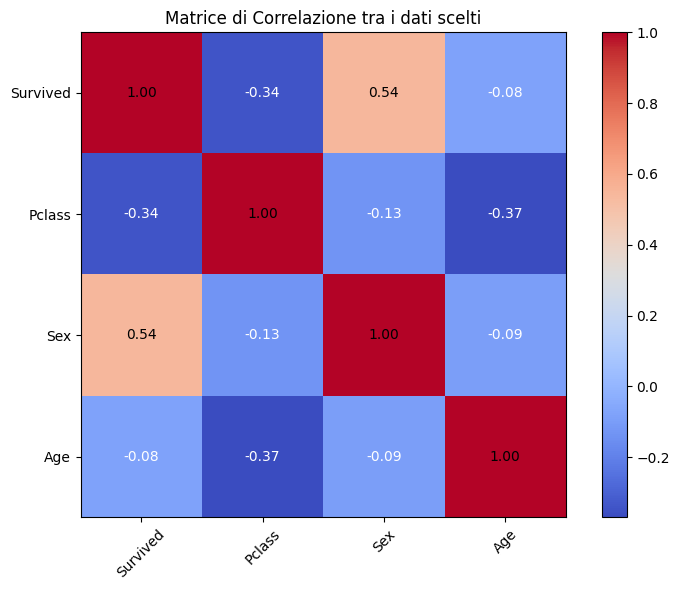

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carica il dataset
titanic_data = pd.read_csv('titanic.csv')

# Prepara i dati
# Converti le variabili categoriche in numeriche
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Seleziona le colonne di interesse
correlation_data = titanic_data[['Survived', 'Pclass', 'Sex', 'Age']]

# Calcola la matrice di correlazione
correlation_matrix = correlation_data.corr()

# Crea un heatmap (callerogramma) usando solo matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Aggiungi le etichette
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)

# Aggiungi i valori della matrice
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='white' if abs(val) < 0.5 else 'black')

plt.title('Matrice di Correlazione tra i dati scelti')
plt.tight_layout()
plt.show()

## GRAFICO A TORTA

### RELAZIONE TRA MASCHI SOPRAVVISSUTI E FEMMINE SOPRAVVISSUTE

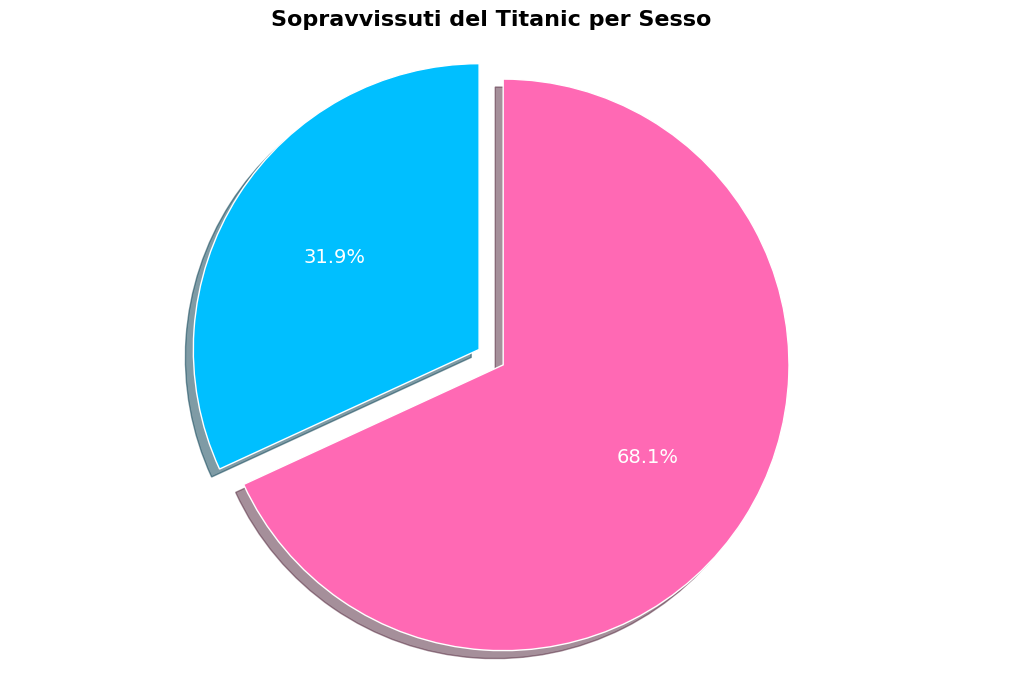

In [35]:
import csv
import matplotlib.pyplot as plt

# Inizializzare i contatori
male_survived = 0
female_survived = 0

# Leggere il file CSV
with open('titanic.csv', mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['Sex'] == 'male':
            if row['Survived'] == '1':
                male_survived += 1
        elif row['Sex'] == 'female':
            if row['Survived'] == '1':
                female_survived += 1

# Dati per il grafico a torta
labels = ['Maschi Sopravvissuti', 'Femmine Sopravvissute']
values = [male_survived, female_survived]

# Creare il grafico a torta
plt.figure(figsize=(10, 7))
wedges, texts, autotexts = plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, 
                                    colors=['#00BFFF', '#FF69B4'], explode=(0.1, 0), shadow=True)

# Personalizzare il testo
for text in texts:
    text.set_fontsize(14)
    text.set_color('white')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

# Aggiungere un titolo
plt.title('Sopravvissuti del Titanic per Sesso', fontsize=16, fontweight='bold')

# Aggiungere un bordo
for wedge in wedges:
    wedge.set_edgecolor('white')

plt.axis('equal')  # Per rendere il grafico a torta un cerchio
plt.tight_layout()
plt.show()

## GRAFICO A BARRE

### RELAZIONE TRA LE CLASSI DEI PASSEGGERI

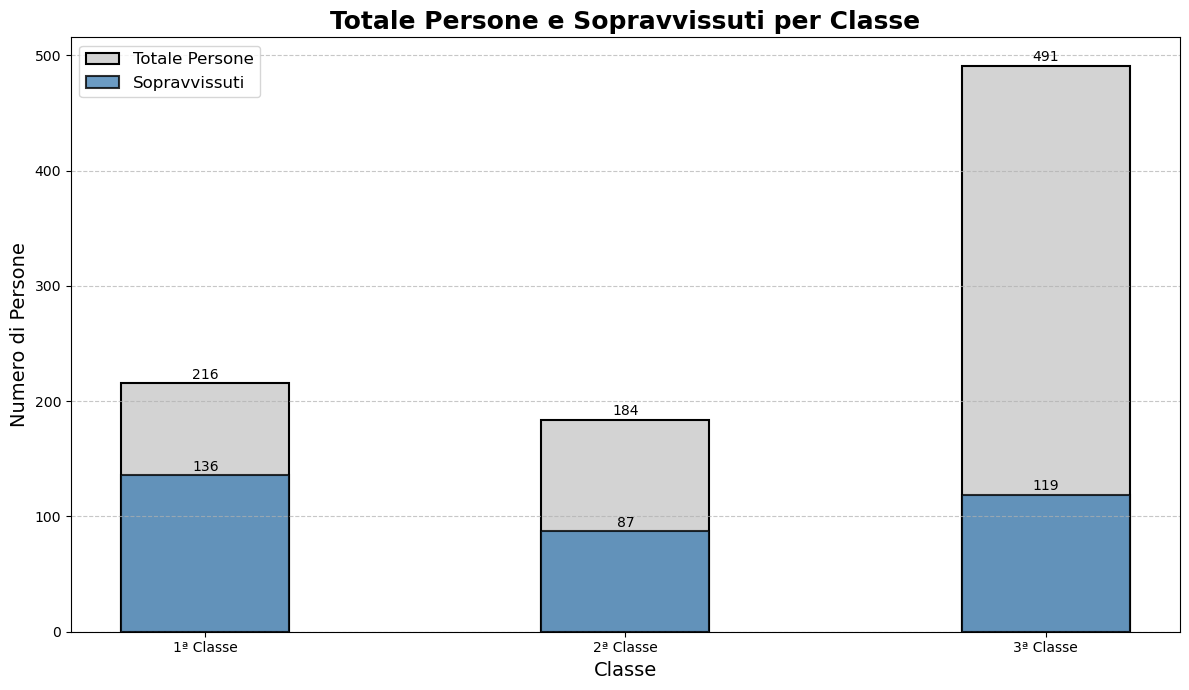

In [19]:
import csv
import matplotlib.pyplot as plt

# Inizializzare i contatori per le classi
class_groups = {
    '1ª Classe': {'total': 0, 'survived': 0},
    '2ª Classe': {'total': 0, 'survived': 0},
    '3ª Classe': {'total': 0, 'survived': 0}
}

# Leggere il file CSV
with open('titanic.csv', mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        pclass = row['Pclass']
        survived = row['Survived']
        
        # Incrementa il totale per la classe
        if pclass == '1':
            class_groups['1ª Classe']['total'] += 1
            if survived == '1':
                class_groups['1ª Classe']['survived'] += 1
        elif pclass == '2':
            class_groups['2ª Classe']['total'] += 1
            if survived == '1':
                class_groups['2ª Classe']['survived'] += 1
        elif pclass == '3':
            class_groups['3ª Classe']['total'] += 1
            if survived == '1':
                class_groups['3ª Classe']['survived'] += 1

# Dati per il grafico
labels = list(class_groups.keys())
total_values = [class_groups[cls]['total'] for cls in labels]
survived_values = [class_groups[cls]['survived'] for cls in labels]

# Creare il grafico a barre
larghezza = 0.4
posizione = range(len(labels))  # Posizioni delle barre

plt.figure(figsize=(12, 7))

# Grafico per il totale delle persone
bars_total = plt.bar(posizione, total_values, label="Totale Persone", width=larghezza, color="#D3D3D3", edgecolor='black', linewidth=1.5)

# Grafico per i sopravvissuti (sovrapposto)
bars_survived = plt.bar(posizione, survived_values, label="Sopravvissuti", width=larghezza, color="#4682B4", edgecolor='black', linewidth=1.5, alpha=0.8)

# Aggiungere etichette e titolo
plt.title('Totale Persone e Sopravvissuti per Classe', fontsize=18, fontweight='bold')
plt.xlabel('Classe', fontsize=14)
plt.ylabel('Numero di Persone', fontsize=14)
plt.xticks(posizione, labels)  # Centrare le etichette
plt.legend(fontsize=12)

# Aggiungere annotazioni sopra le barre
for bar in bars_total:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

for bar in bars_survived:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Aggiungere una griglia orizzontale
plt.tight_layout()
plt.show()

## GRAFICO A TORTA

### RELAZIONE TRA LE CLASSI DEI PASSEGGERI

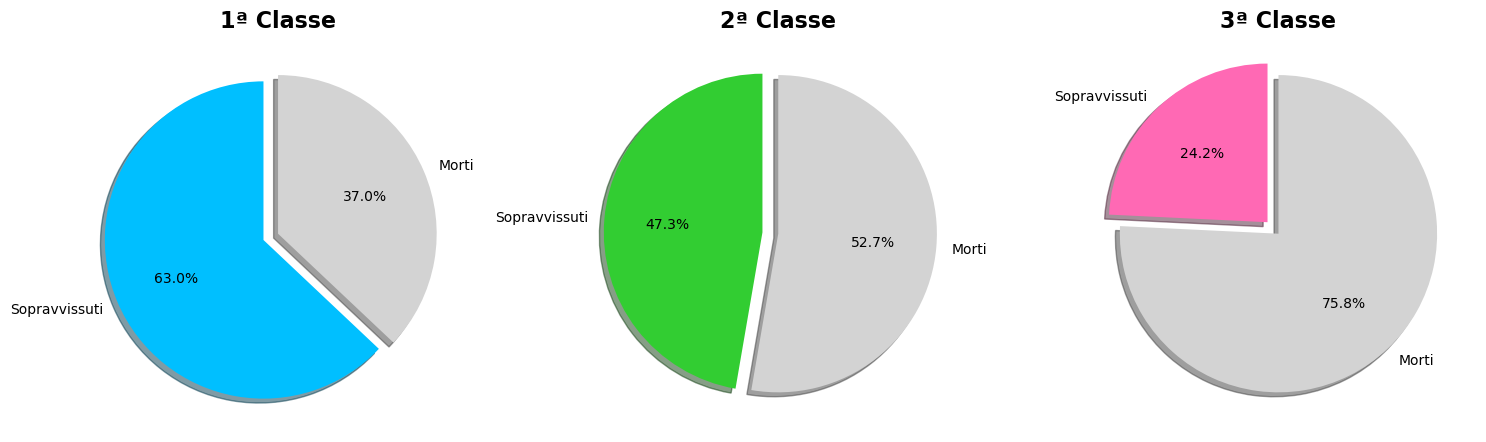

In [17]:
import csv
import matplotlib.pyplot as plt

# Inizializzare i contatori per le classi
class_groups = {
    '1ª Classe': {'total': 0, 'survived': 0},
    '2ª Classe': {'total': 0, 'survived': 0},
    '3ª Classe': {'total': 0, 'survived': 0}
}

# Leggere il file CSV
with open('titanic.csv', mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        pclass = row['Pclass']
        survived = row['Survived']
        
        # Incrementa il totale per la classe
        if pclass == '1':
            class_groups['1ª Classe']['total'] += 1
            if survived == '1':
                class_groups['1ª Classe']['survived'] += 1
        elif pclass == '2':
            class_groups['2ª Classe']['total'] += 1
            if survived == '1':
                class_groups['2ª Classe']['survived'] += 1
        elif pclass == '3':
            class_groups['3ª Classe']['total'] += 1
            if survived == '1':
                class_groups['3ª Classe']['survived'] += 1

# Creare i grafici a torta
plt.figure(figsize=(15, 5))

# Grafico a torta per la 1ª Classe
plt.subplot(1, 3, 1)
labels_1 = ['Sopravvissuti', 'Morti']
sizes_1 = [class_groups['1ª Classe']['survived'], class_groups['1ª Classe']['total'] - class_groups['1ª Classe']['survived']]
explode_1 = (0.1, 0)  # Esplodi la fetta dei sopravvissuti
plt.pie(sizes_1, labels=labels_1, autopct='%1.1f%%', startangle=90, colors=['#00BFFF', '#D3D3D3'], explode=explode_1, shadow=True)
plt.title('1ª Classe', fontsize=16, fontweight='bold')

# Grafico a torta per la 2ª Classe
plt.subplot(1, 3, 2)
labels_2 = ['Sopravvissuti', 'Morti']
sizes_2 = [class_groups['2ª Classe']['survived'], class_groups['2ª Classe']['total'] - class_groups['2ª Classe']['survived']]
explode_2 = (0.1, 0)  # Esplodi la fetta dei sopravvissuti
plt.pie(sizes_2, labels=labels_2, autopct='%1.1f%%', startangle=90, colors=['#32CD32', '#D3D3D3'], explode=explode_2, shadow=True)
plt.title('2ª Classe', fontsize=16, fontweight='bold')

# Grafico a torta per la 3ª Classe
plt.subplot(1, 3, 3)
labels_3 = ['Sopravvissuti', 'Morti']
sizes_3 = [class_groups['3ª Classe']['survived'], class_groups['3ª Classe']['total'] - class_groups['3ª Classe']['survived']]
explode_3 = (0.1, 0)  # Esplodi la fetta dei sopravvissuti
plt.pie(sizes_3, labels=labels_3, autopct='%1.1f%%', startangle=90, colors=['#FF69B4', '#D3D3D3'], explode=explode_3, shadow=True)
plt.title('3ª Classe', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

## GRAFICO A BARRE

### RELAZIONE TRA LE FASCE D'ETA' DEI PASSEGGERI

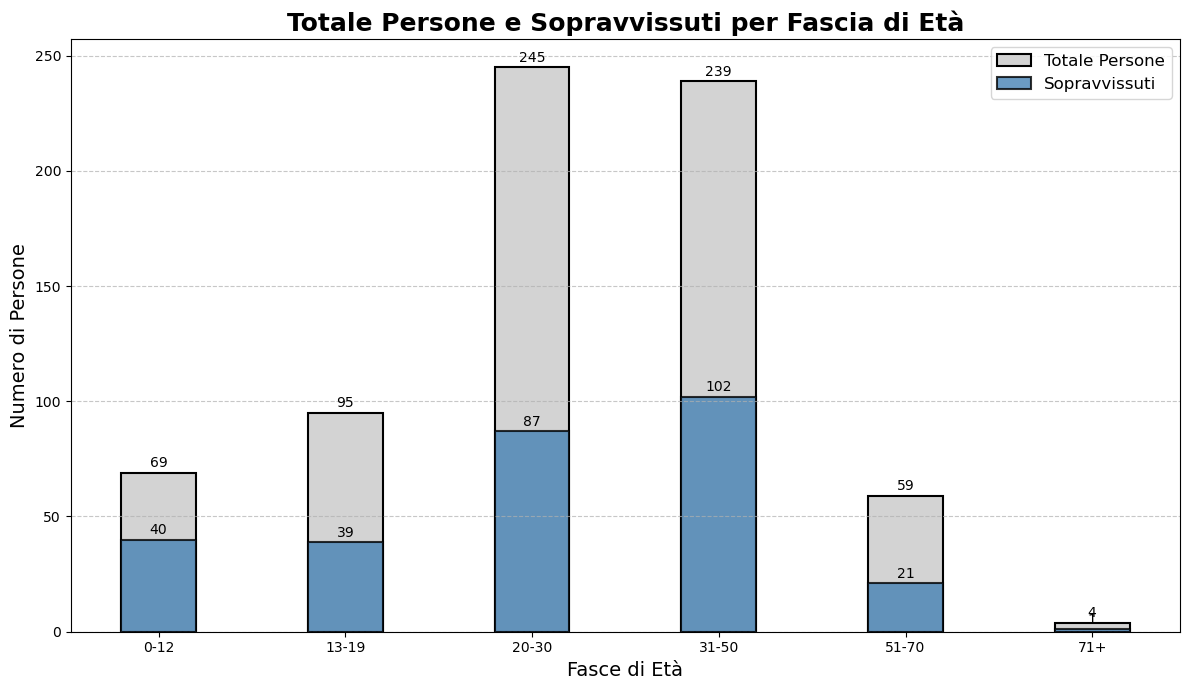

In [13]:
import csv
import matplotlib.pyplot as plt

# Inizializzare i contatori per le fasce di età
age_groups = {
    '0-12': {'total': 0, 'survived': 0},
    '13-19': {'total': 0, 'survived': 0},
    '20-30': {'total': 0, 'survived': 0},
    '31-50': {'total': 0, 'survived': 0},
    '51-70': {'total': 0, 'survived': 0},
    '71+': {'total': 0, 'survived': 0}
}

# Leggere il file CSV
with open('titanic.csv', mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        age = row['Age']
        survived = row['Survived']
        
        # Controlla se l'età è un numero
        if age:
            age = float(age)
            # Incrementa il totale per la fascia di età
            if age <= 12:
                age_groups['0-12']['total'] += 1
                if survived == '1':
                    age_groups['0-12']['survived'] += 1
            elif 13 <= age <= 19:
                age_groups['13-19']['total'] += 1
                if survived == '1':
                    age_groups['13-19']['survived'] += 1
            elif 20 <= age <= 30:
                age_groups['20-30']['total'] += 1
                if survived == '1':
                    age_groups['20-30']['survived'] += 1
            elif 31 <= age <= 50:
                age_groups['31-50']['total'] += 1
                if survived == '1':
                    age_groups['31-50']['survived'] += 1
            elif 51 <= age <= 70:
                age_groups['51-70']['total'] += 1
                if survived == '1':
                    age_groups['51-70']['survived'] += 1
            elif age >= 71:  # 71+
                age_groups['71+']['total'] += 1
                if survived == '1':
                    age_groups['71+']['survived'] += 1

# Dati per il grafico
labels = list(age_groups.keys())
total_values = [age_groups[age]['total'] for age in labels]
survived_values = [age_groups[age]['survived'] for age in labels]

# Creare il grafico a barre
larghezza = 0.4
posizione = range(len(labels))  # Posizioni delle barre

plt.figure(figsize=(12, 7))

# Grafico per il totale delle persone
plt.bar(posizione, total_values, label="Totale Persone", width=larghezza, color="#D3D3D3", edgecolor='black', linewidth=1.5)

# Grafico per i sopravvissuti (sovrapposto)
plt.bar(posizione, survived_values, label="Sopravvissuti", width=larghezza, color="#4682B4", edgecolor='black', linewidth=1.5, alpha=0.8)

# Aggiungere etichette e titolo
plt.title('Totale Persone e Sopravvissuti per Fascia di Età', fontsize=18, fontweight='bold')
plt.xlabel('Fasce di Età', fontsize=14)
plt.ylabel('Numero di Persone', fontsize=14)
plt.xticks(posizione, labels)  # Centrare le etichette
plt.legend(fontsize=12)

# Aggiungere annotazioni sopra le barre
for i in range(len(total_values)):
    plt.text(i, total_values[i] + 1, str(total_values[i]), ha='center', va='bottom', fontsize=10)
    plt.text(i, survived_values[i] + 1, str(survived_values[i]), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Aggiungere una griglia orizzontale
plt.tight_layout()
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

#selezione le feature e la variabile target, escludendo ciò che non serve 
X=titanic_data[["Sex", "Age", "Pclass"]]
y=titanic_data["Survived"]

#divide il dataset in training e test set
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

#crea il modello Decision Tree con un limite alla profondità
model=DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)

#fa le previsioni sul test set
y_pred=model.predict(X_test)

#visualizza i risultati
print("Classificazoine report: ")
print(classification_report(y_test,y_pred))
print("Accuratezza: ", accuracy_score(y_test, y_pred))

Classificazoine report: 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

Accuratezza:  0.8059701492537313


## DECISION-TREE

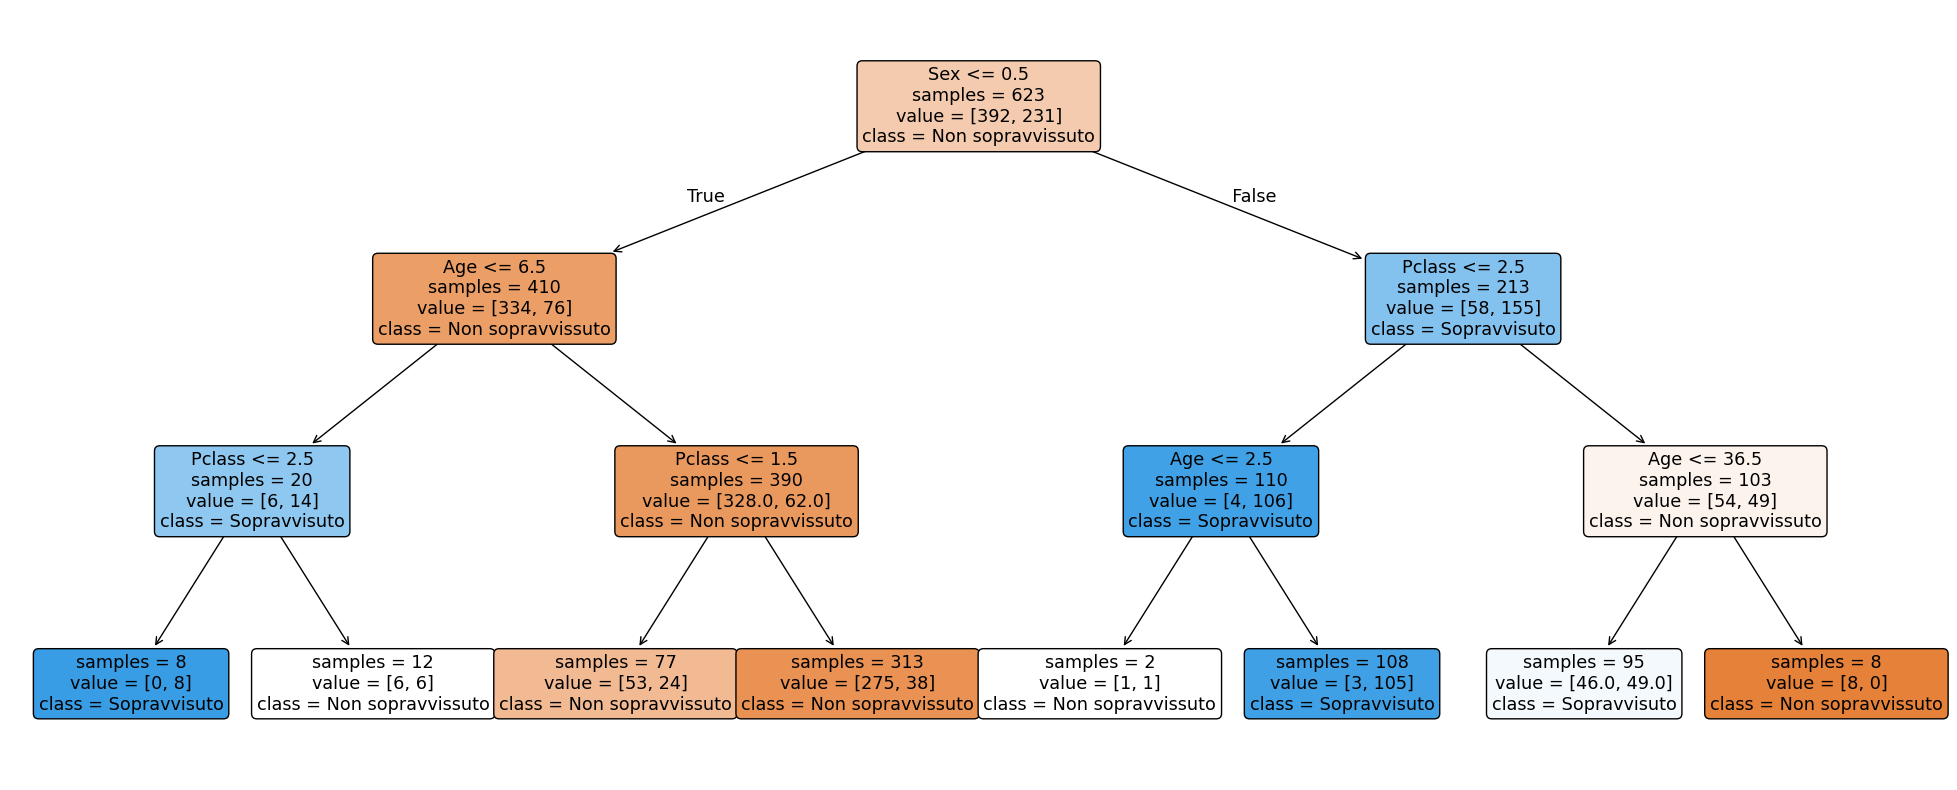

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#visualizza l'albero decisionale con dimensioni ridotte e senza impurità
plt.figure(figsize=(25,10)) #dimesione grafico (larghezza,altezza)
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Non sopravvissuto", "Sopravvisuto"],
    filled=True,
    impurity=False,
    rounded=True
)
plt.show()

## CONCLUSIONI

In conclusione abbiamo trovato che il passeggero ideale per sopravvivere all'incidente del titanic è una raggazza tra gli 0 e 12 anni in prima classe come Helen Louraine Allison